In [12]:
# Dependencies
import numpy as np
import datetime as dt
import pandas as pd
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, or_
from flask import Flask, jsonify
from matplotlib import pyplot as plt

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [64]:
meas = session.query(Measurement)
meas.__dict__['_raw_columns'][0]

Table('measurement', MetaData(), Column('id', INTEGER(), table=<measurement>, primary_key=True, nullable=False), Column('station', TEXT(), table=<measurement>), Column('date', TEXT(), table=<measurement>), Column('prcp', FLOAT(), table=<measurement>), Column('tobs', FLOAT(), table=<measurement>), schema=None)

## D1: Determine the Summary Statistics for June

In [65]:
# Import the sqlalchemy extract function.
from sqlalchemy import extract

# 1. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
result = session.query(
    Measurement.date, Measurement.tobs, Measurement.prcp).\
filter(or_(
    Measurement.date.between('2010-06-01', '2010-06-30'),
    Measurement.date.between('2011-06-01', '2011-06-30'),
    Measurement.date.between('2012-06-01', '2012-06-30'),
    Measurement.date.between('2013-06-01', '2013-06-30'),
    Measurement.date.between('2014-06-01', '2014-06-30'),
    Measurement.date.between('2015-06-01', '2015-06-30'),
    Measurement.date.between('2016-06-01', '2016-06-30'),
    Measurement.date.between('2017-06-01', '2017-06-30'),
))

In [66]:
# 2. Convert the June temperatures to a list.
list_df_june = list(result)

In [68]:
# 3. Create a DataFrame from the list of temperatures for the month of June. 
df_june = pd.DataFrame(list_df_june, columns=['date','June Temps', 'June precip'])

In [69]:
# 4. Calculate and print out the summary statistics for the June temperature DataFrame.
df_june.describe()

,June Temps,June precip
count,1700.000000,1574.000000
mean,74.944118,0.136360
std,3.257417,0.335731
min,64.000000,0.000000
25%,73.000000,0.000000
50%,75.000000,0.020000
75%,77.000000,0.120000
max,85.000000,4.430000


Text(0.5, 1.0, 'June Temps Box Plot')

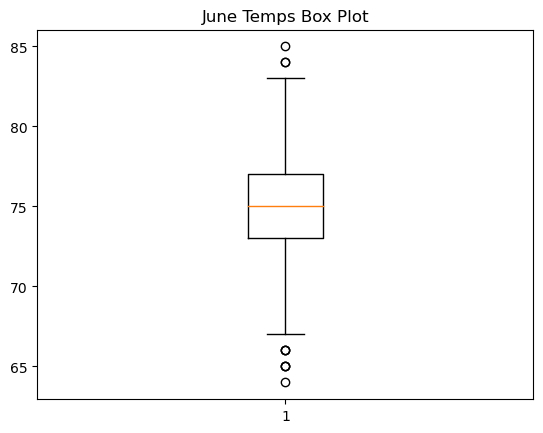

In [34]:
# 5. Return to your challenge instructions to compare your summary statistics
plt.ax = plt.boxplot(df_june['June Temps'])
plt.title('June Temps Box Plot')

## D2: Determine the Summary Statistics for December

In [70]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
result = session.query(
    Measurement.date, Measurement.tobs, Measurement.prcp).\
filter(or_(
    Measurement.date.between('2010-12-01', '2010-12-31'),
    Measurement.date.between('2011-12-01', '2011-12-31'),
    Measurement.date.between('2012-12-01', '2012-12-31'),
    Measurement.date.between('2013-12-01', '2013-12-31'),
    Measurement.date.between('2014-12-01', '2014-12-31'),
    Measurement.date.between('2015-12-01', '2015-12-31'),
    Measurement.date.between('2016-12-01', '2016-12-31'),
    Measurement.date.between('2017-12-01', '2017-12-31'),
))

In [71]:
# 7. Convert the December temperatures to a list.
list_df_dec = list(result)

In [72]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
df_dec = pd.DataFrame(list_df_dec, columns=['date','Dec Temps', 'Dec precip'])

In [73]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
df_dec.describe()

,Dec Temps,Dec precip
count,1517.000000,1405.000000
mean,71.041529,0.216819
std,3.745920,0.541399
min,56.000000,0.000000
25%,69.000000,0.000000
50%,71.000000,0.030000
75%,74.000000,0.150000
max,83.000000,6.420000


Text(0.5, 1.0, 'Dec Temps Box Plot')

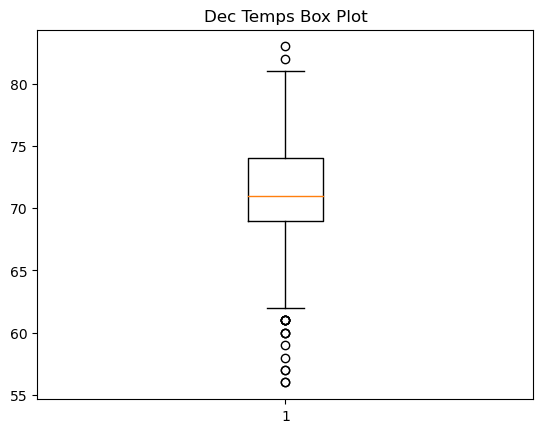

In [35]:
# 10. Return to your challenge instructions to compare your summary statistics
plt.ax = plt.boxplot(df_dec['Dec Temps'])
plt.title('Dec Temps Box Plot')

In [105]:
dec = df_dec['Dec precip'].sort_values(ascending=False).reset_index(drop=True)

Text(0.5, 1.0, 'Temp Ranges for June and Dec in Hawaii')

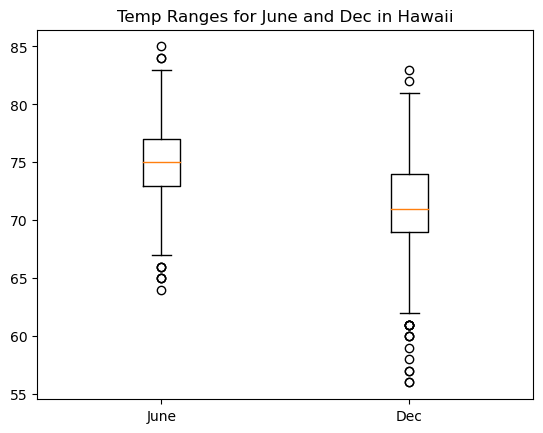

In [43]:
plt.ax = plt.boxplot([df_june['June Temps'],df_dec['Dec Temps']])
plt.xticks([1,2],['June', 'Dec']) 
plt.title('Temp Ranges for June and Dec in Hawaii')

Text(0.5, 1.0, 'precip Ranges for June and Dec in Hawaii')

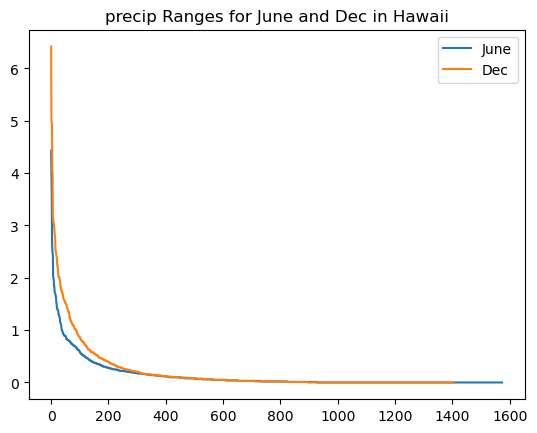

In [103]:
plt.plot(jun)
plt.plot(dec)
plt.legend(['June', 'Dec']) 
plt.title('precip Ranges for June and Dec in Hawaii')